In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
import random

Mounted at /content/drive


In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

def create_image_dataframe(images_dir):
    data = []
    for filename in os.listdir(images_dir):
        if filename.endswith('.jpg'):
            # Extract the label based on the format
            label = '_'.join(filename.split('_')[:-1])
            data.append((filename, label))
    return pd.DataFrame(data, columns=['filename', 'label'])

images_dir = '/content/drive/MyDrive/Colab Notebooks/EE4062_project/dataset/Train'
df = create_image_dataframe(images_dir)

unique_labels = df['label'].unique()
print("Unique labels in the dataset:", unique_labels)
print("Number of unique labels:", len(unique_labels))

Unique labels in the dataset: ['Amoeba' 'Lepocinclis_spirogyroides' 'Volvox_tertius'
 'Micrasterias_rotata' 'Peridinium_spec' 'Pinnularia_neomajor'
 'Pleurotaenium_ehrenbergii' 'Pyrocystis_lunula' 'Paramecium_bursaria'
 'Cylindrocystis_brebissonii' 'Colsterium_ehrenbergii']
Number of unique labels: 11


In [3]:
# Split into train, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, stratify=test_df['label'], random_state=42)

print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Test set size:", len(test_df))

Training set size: 1413
Validation set size: 177
Test set size: 177


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create training generator
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=images_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical'
)

# Create validation generator
validation_generator = val_test_datagen.flow_from_dataframe(
    val_df,
    directory=images_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Create test generator
test_generator = val_test_datagen.flow_from_dataframe(
    test_df,
    directory=images_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1413 validated image filenames belonging to 11 classes.
Found 177 validated image filenames belonging to 11 classes.
Found 177 validated image filenames belonging to 11 classes.


In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10  # You can increase the number of epochs for better results
)

Epoch 1/10
45/45 [==============================] - 234s 5s/step - loss: 2.1117 - accuracy: 0.5138 - val_loss: 0.9620 - val_accuracy: 0.6554
Epoch 2/10
45/45 [==============================] - 46s 1s/step - loss: 0.8654 - accuracy: 0.7077 - val_loss: 0.7393 - val_accuracy: 0.7401
Epoch 3/10
45/45 [==============================] - 44s 983ms/step - loss: 0.5325 - accuracy: 0.8132 - val_loss: 0.6778 - val_accuracy: 0.7740
Epoch 4/10
45/45 [==============================] - 45s 997ms/step - loss: 0.3533 - accuracy: 0.8790 - val_loss: 0.6589 - val_accuracy: 0.7571
Epoch 5/10
45/45 [==============================] - 50s 1s/step - loss: 0.2187 - accuracy: 0.9278 - val_loss: 0.5920 - val_accuracy: 0.8305
Epoch 6/10
45/45 [==============================] - 44s 983ms/step - loss: 0.0917 - accuracy: 0.9703 - val_loss: 0.7245 - val_accuracy: 0.8362
Epoch 7/10
45/45 [==============================] - 44s 982ms/step - loss: 0.0517 - accuracy: 0.9809 - val_loss: 0.8412 - val_accuracy: 0.8079
Epoch 8

In [6]:
# Load the saved model
model = load_model('/content/drive/MyDrive/Colab Notebooks/EE4062_project/saved_model/my_model_1')

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/EE4062_project/saved_model/my_model_1')

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate on the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Print the classification report
target_names = list(test_generator.class_indices.keys())
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Save the plot to a file
conf_matrix_output_path = '/content/drive/MyDrive/Colab Notebooks/EE4062_project/test_output/confusion_matrix.png'
plt.savefig(conf_matrix_output_path, bbox_inches='tight', dpi=300)
plt.close()

print(f"Confusion Matrix saved to {conf_matrix_output_path}")

# Show the plot
plt.show()

6/6 [==============================] - 7s 1s/step
Classification Report
                            precision    recall  f1-score   support

                    Amoeba       1.00      1.00      1.00        96
    Colsterium_ehrenbergii       0.77      0.91      0.83        11
Cylindrocystis_brebissonii       0.78      0.70      0.74        10
 Lepocinclis_spirogyroides       1.00      0.90      0.95        10
       Micrasterias_rotata       0.88      0.78      0.82         9
       Paramecium_bursaria       1.00      0.50      0.67         2
           Peridinium_spec       0.57      0.80      0.67         5
       Pinnularia_neomajor       0.40      0.40      0.40         5
 Pleurotaenium_ehrenbergii       0.75      0.67      0.71         9
         Pyrocystis_lunula       0.62      0.50      0.56        10
            Volvox_tertius       0.77      1.00      0.87        10

                  accuracy                           0.89       177
                 macro avg       0.78     

1/1 [==============================] - 0s 36ms/step
Real Label: Volvox_tertius
Predicted Label: Volvox_tertius


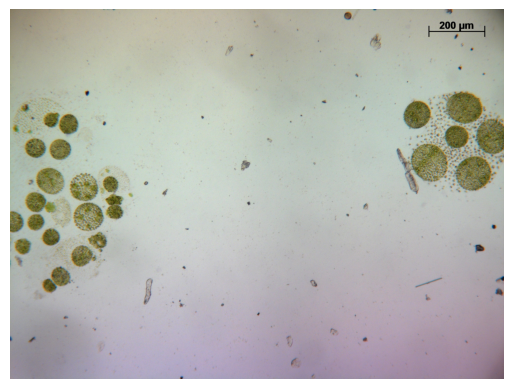

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims to fit model input shape
    return img_array

def classify_image(model, img_path, class_indices):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}
    return class_labels[predicted_class]

# Choose an image from the test set
test_image = test_df.iloc[120]  # Change the index to test different images
img_path = os.path.join(images_dir, test_image['filename'])
real_label = test_image['label']

# Classify the image
predicted_label = classify_image(model, img_path, train_generator.class_indices)

# Print the results and show the image
print(f"Real Label: {real_label}")
print(f"Predicted Label: {predicted_label}")

# Display the image
img = load_img(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()